# Import dependencies

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from scipy.optimize import curve_fit


%matplotlib inline

# Functions

In [2]:
def fit_data(totale_casi, func):
    xdata = np.arange(len(totale_casi))
    popt, pcov = curve_fit(func, xdata, totale_casi)
    
    print("Parameters: {0}".format(popt))
    
    plt.rcParams.update({"legend.fontsize": "x-large",
                     "figure.figsize": (20, 15),
                     'xtick.labelsize': 10})
    ax = plt.gca()
    formatter = mdates.DateFormatter("%m-%d")
    ax.xaxis.set_major_formatter(formatter)
    locator = mdates.DayLocator()
    ax.xaxis.set_major_locator(locator)

    plt.plot(data, totale_casi, label="Totale casi")
    plt.plot(data, func(xdata, *popt), "--", label="Curve fit")

    plt.legend(loc="upper left")
    plt.show()
    
    return xdata, popt, pcov

# Load data

In [3]:
dati_andamento_nazionale_fpath = "../../dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv"
df = pd.read_csv(dati_andamento_nazionale_fpath, sep=",")

In [4]:
df.tail()

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
25,2020-03-20 17:00:00,ITA,16020,2655,18675,19185,37860,4670,5129,4032,47021,206886
26,2020-03-21 17:00:00,ITA,17708,2857,20565,22116,42681,4821,6072,4825,53578,233222
27,2020-03-22 17:00:00,ITA,19846,3009,22855,23783,46638,3957,7024,5476,59138,258402
28,2020-03-23 17:00:00,ITA,20692,3204,23896,26522,50418,3780,7432,6077,63927,275468
29,2020-03-24 17:00:00,ITA,21937,3396,25333,28697,54030,3612,8326,6820,69176,296964


## Coverti data: string to datetime object

In [5]:
df.loc[:, "data"] = df.loc[:, "data"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))

In [6]:
df.tail()

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
25,2020-03-20 17:00:00,ITA,16020,2655,18675,19185,37860,4670,5129,4032,47021,206886
26,2020-03-21 17:00:00,ITA,17708,2857,20565,22116,42681,4821,6072,4825,53578,233222
27,2020-03-22 17:00:00,ITA,19846,3009,22855,23783,46638,3957,7024,5476,59138,258402
28,2020-03-23 17:00:00,ITA,20692,3204,23896,26522,50418,3780,7432,6077,63927,275468
29,2020-03-24 17:00:00,ITA,21937,3396,25333,28697,54030,3612,8326,6820,69176,296964


# Totale casi 

In [7]:
df[ df["data"] == df["data"].max() ]

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
29,2020-03-24 17:00:00,ITA,21937,3396,25333,28697,54030,3612,8326,6820,69176,296964


In [8]:
df[ df["data"] == df["data"].max() ][["totale_casi"]]

,totale_casi
29,69176


## Grafico andamento giornaliero

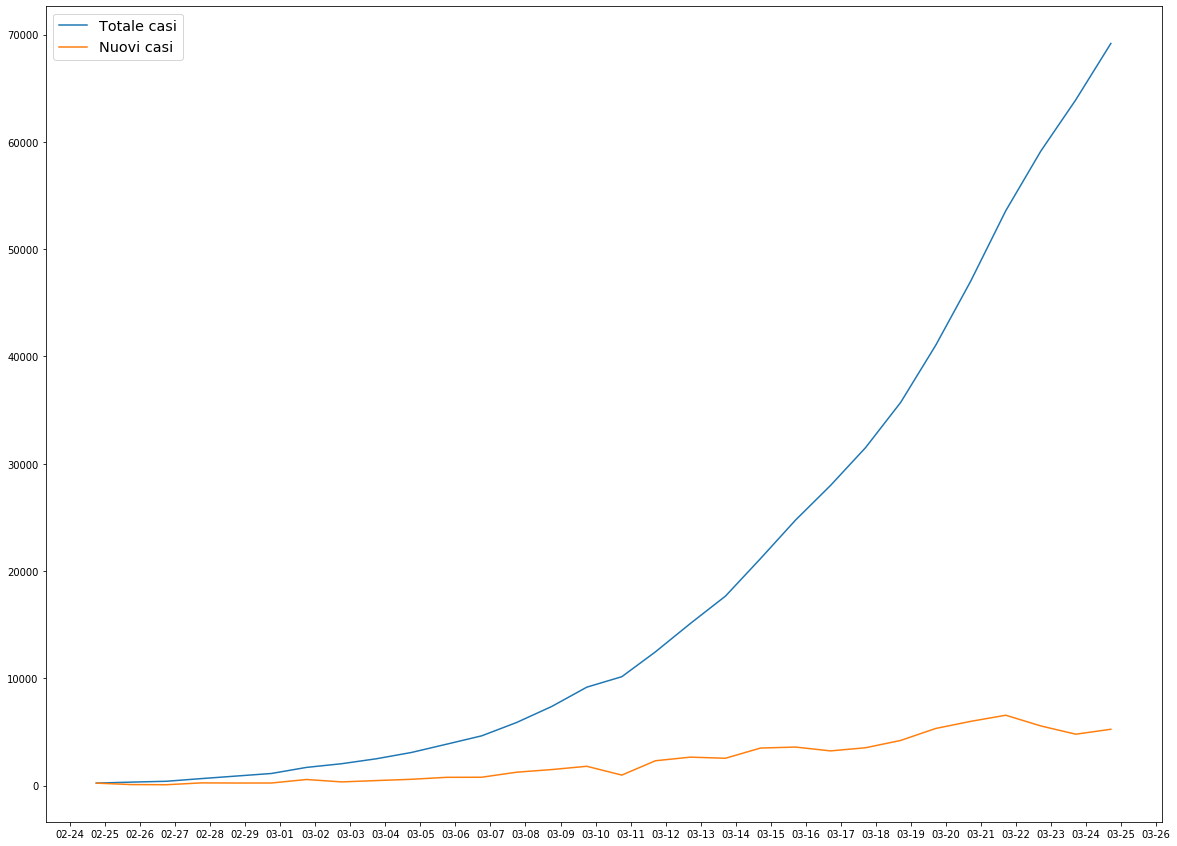

In [9]:
plt.rcParams.update({"legend.fontsize": "x-large",
                     "figure.figsize": (20, 15),
                     'xtick.labelsize': 10})
ax = plt.gca()
formatter = mdates.DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(formatter)
locator = mdates.DayLocator()
ax.xaxis.set_major_locator(locator)

data = df["data"].values
totale_casi = df["totale_casi"].values
nuovi_casi = np.roll(totale_casi, 1)
nuovi_casi[0] = 0

plt.plot(data, totale_casi, label="Totale casi")
plt.plot(data, totale_casi - nuovi_casi, label="Nuovi casi")

plt.legend(loc="upper left")
plt.show()

# Exponential curve fit per casi totali

In [10]:
def exponential_func(x, a, b, c):
    return a * np.exp(b * x) + c

Parameters: [ 3.15688082e+03  1.10338345e-01 -4.66361172e+03]


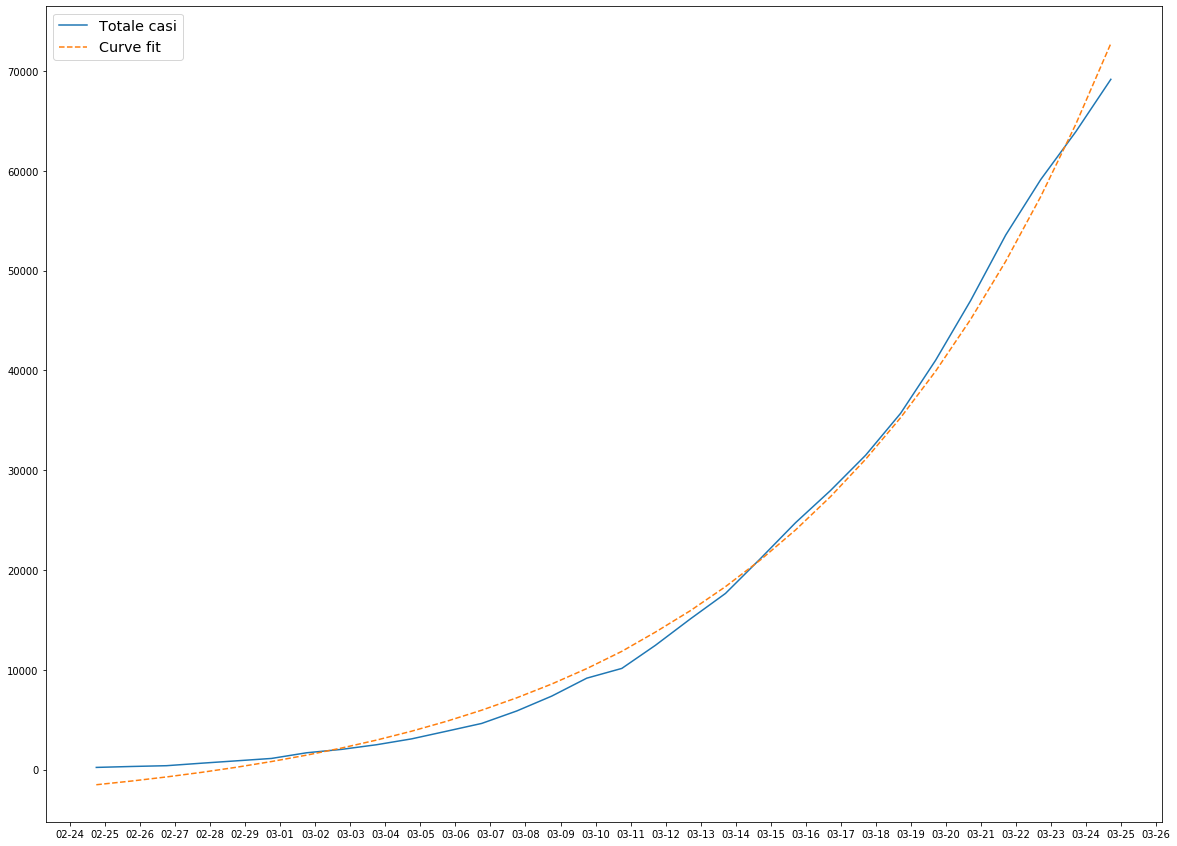

In [11]:
xdata, popt_exp, pcov_exp = fit_data(totale_casi, exponential_func)

In [12]:
np.sqrt(np.diag(pcov_exp)).sum()

1170.5918679484525

In [13]:
exponential_pred = exponential_func(np.array([xdata[-1]+1]), *popt_exp).astype(int)
print(exponential_pred)

[81800]


# Cubic curve fit per casi totali

In [14]:
def cubic_func(x, a, b, c, d):
    return a*np.power(x, 3) + b*np.power(x, 2) + c*x + d

Parameters: [  2.67432974   6.75090188 -11.63138239 515.98804985]


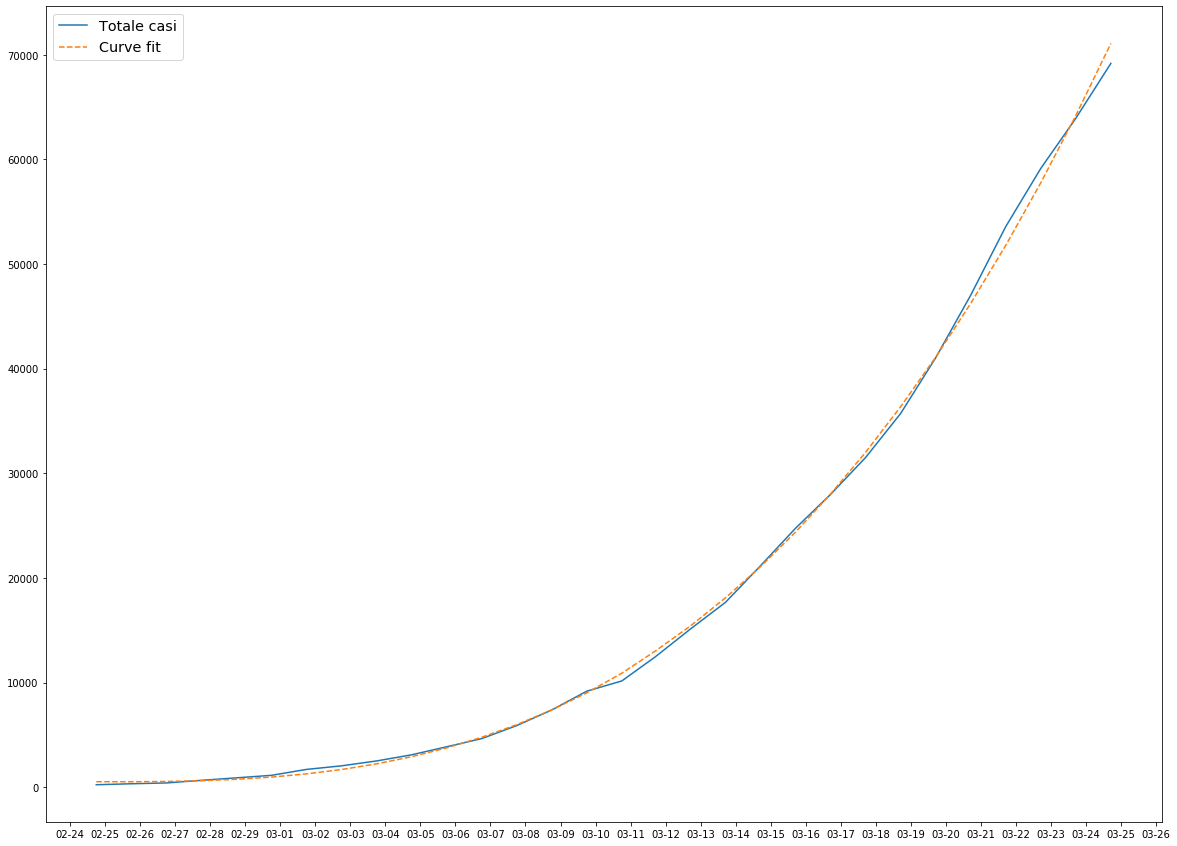

In [15]:
xdata, popt_cub, pcov_cub = fit_data(totale_casi, cubic_func)

## Errore parametri

In [16]:
np.sqrt(np.diag(pcov_cub)).sum()

585.7112493287043

## Predizione giorno seguente

In [17]:
cubic_pred = cubic_func(np.array([xdata[-1]+1]), *popt_cub).astype(int)
print(cubic_pred)

[78449]


# Quadratic curve fit per casi totali

In [18]:
def quadratic_func(x, a, b, c):
    return a*np.power(x, 2) + b*x + c

Parameters: [  123.08424543 -1338.36636572  3447.58831585]


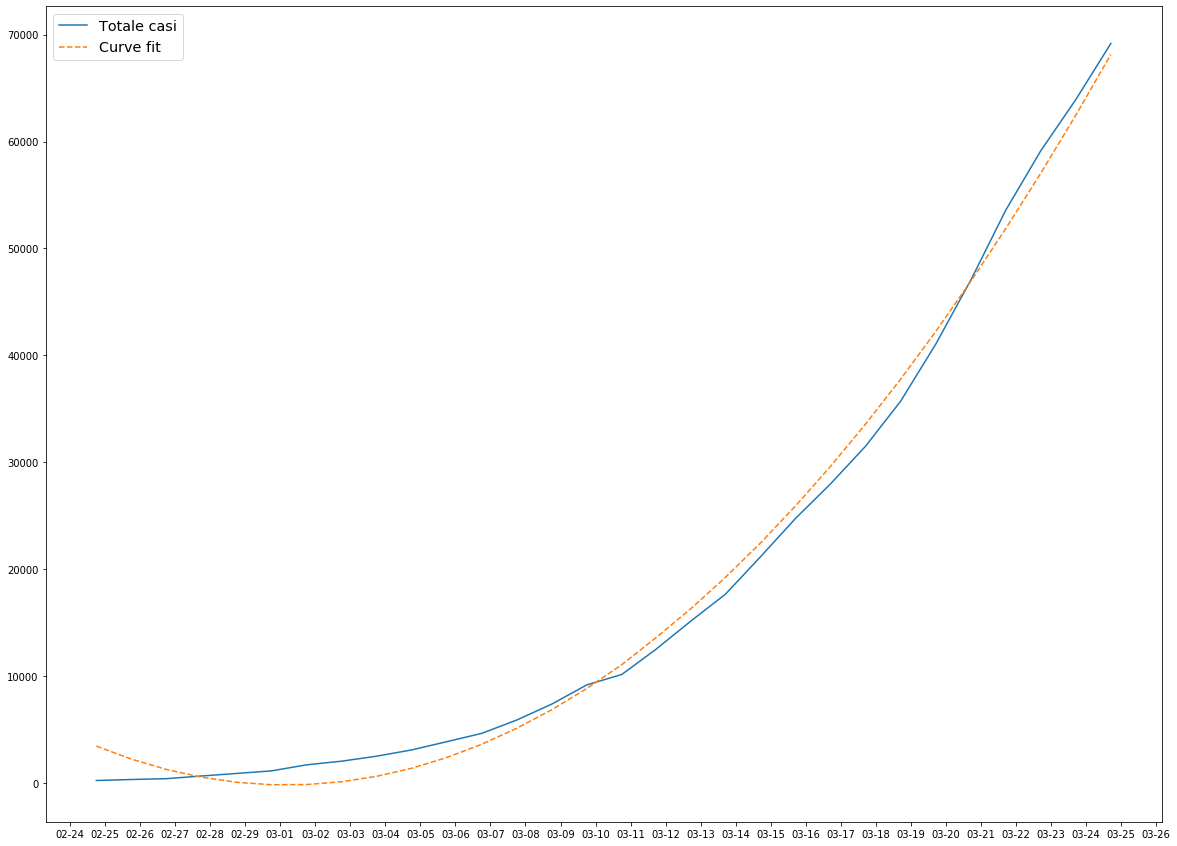

In [19]:
xdata, popt_sqr, pcov_sqr = fit_data(totale_casi, quadratic_func)

## Errore parametri

In [20]:
np.sqrt(np.diag(pcov_sqr)).sum()

941.8999855483069

## Predizione giorno seguente

In [21]:
quadratic_pred = quadratic_func(np.array([xdata[-1]+1]), *popt_sqr).astype(int)
print(quadratic_pred)

[74072]


# Combinazione modelli

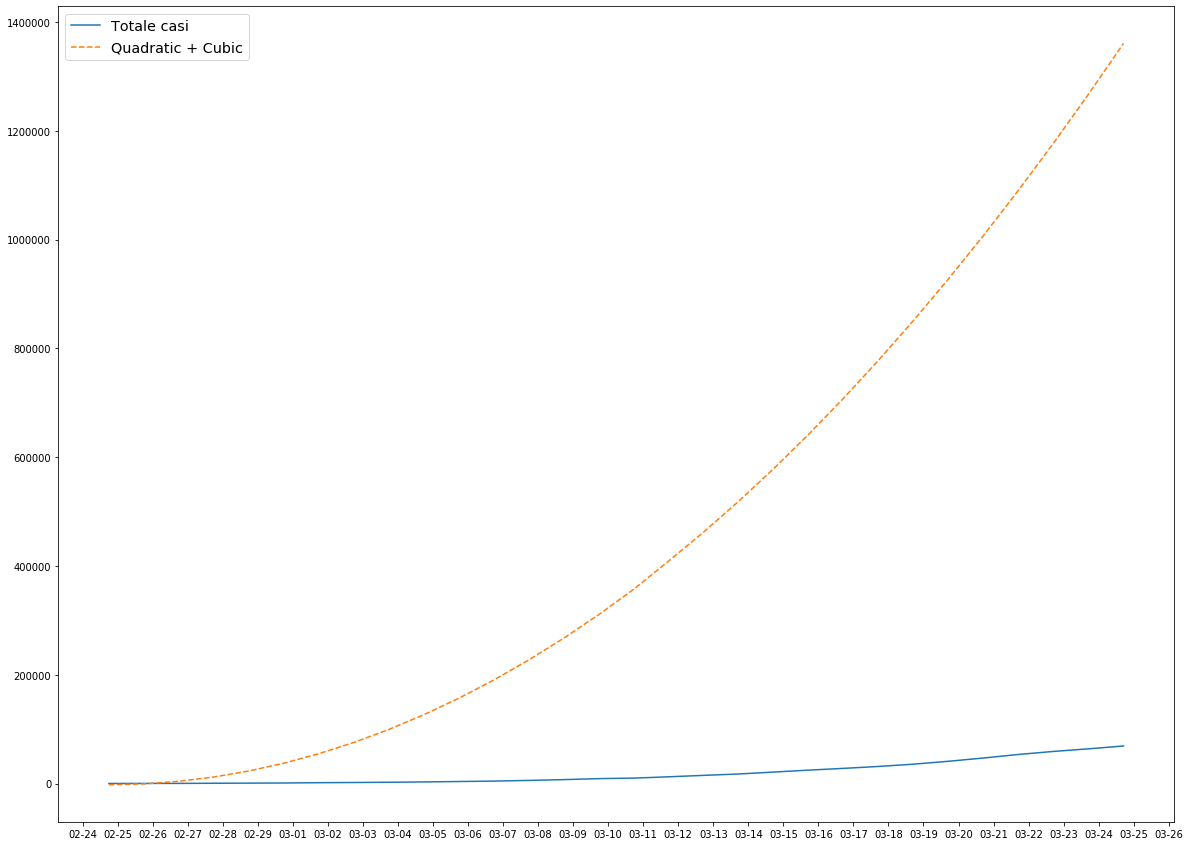

In [24]:
ensemble = (quadratic_func(xdata, *popt_exp) + cubic_func(xdata, *popt_cub))/2

plt.rcParams.update({"legend.fontsize": "x-large",
                 "figure.figsize": (20, 15),
                 'xtick.labelsize': 10})
ax = plt.gca()
formatter = mdates.DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(formatter)
locator = mdates.DayLocator()
ax.xaxis.set_major_locator(locator)

plt.plot(data, totale_casi, label="Totale casi")
plt.plot(data, ensemble, "--", label="Quadratic + Cubic")

plt.legend(loc="upper left")
plt.show()

## Predizione giorno seguente

In [25]:
int((quadratic_pred + cubic_pred)/2)

76260